In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

## trees.csv를 읽어들여서 아래에 대해

In [5]:
df_tree = pd.read_csv('./data/trees.csv')
df_tree.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


### 상관관계, 다중공선성을 확인하시요

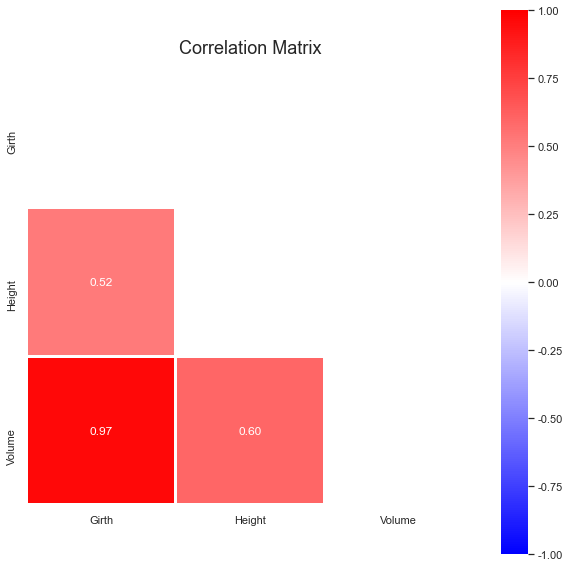

In [10]:
## 상관관계
import seaborn as sns
corr = df_tree.corr()

plt.figure(figsize=(10,10))
sns.set(style='white')  
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask, cmap='bwr',vmin=-1, vmax=1,
            square=True, linewidths=2.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=18)
plt.show()

In [14]:
## 다중 공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(df_tree.values, i )  for i in range( df_tree.shape[1] ) ]
vif['features'] = df_tree.columns
vif


,VIF Factor,features
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


### crossvalidation score 를 구하시요.

In [15]:
x_data, y_data = df_tree[['Girth', 'Height']].values, df_tree[['Volume']].values

In [17]:
model = make_pipeline(StandardScaler(), LinearRegression())
r2_score = cross_val_score(model, x_data, y_data, scoring='r2', cv=5)
print('r2 score : ', r2_score)
print('r2 score 평균 :', r2_score.mean())

r2 score :  [-2.42679092  0.59361755 -0.14097307  0.45908741 -0.6044407 ]
r2 score 평균 : -0.4238999480904363


### 아래의 데이터를 이용하여 Volume을 예측하시요
Girth 8.8, 10.5
Height 63, 72


In [19]:
model.fit(x_data, y_data)
pred = model.predict([[8.8, 63], [10.5, 72]])
print(pred)

[[ 4.81698127]
 [15.87411523]]


## volume이 40 이상이면 크다, 30이상이면 보통 미만이면 적음으로 아래와 같이 출력하시요.

|volume | 정도|
|---|---|
 |10.3   | 적음|
...

In [31]:
def fun1(x):
    if x >= 40: return '크다'
    if x >= 30: return '보통'
    return '적음'

df_vol = df_tree[['Volume']]
df_vol['정도'] = df_tree['Volume'].apply(fun1)
df_vol.head()

<ipython-input-31-4a1c431be5f6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol['정도'] = df_tree['Volume'].apply(fun1)


,Volume,정도
0,10.3,적음
1,10.3,적음
2,10.2,적음
3,16.4,적음
4,18.8,적음


## Height  가 가장 작은값과 큰값을 구하시요

In [35]:
m, M = df_tree['Height'].min(), df_tree['Height'].max()
print(f'최솟값:{m}, 최댓값:{M}')

최솟값:63, 최댓값:87


## girth(테두리) 가 가장큰 top5를 구하시요(girth, height, volume)

In [39]:
top5 = df_tree.sort_values('Girth', ascending=False).head(5)
display(top5)

,Girth,Height,Volume
30,20.6,87,77.0
29,18.0,80,51.0
28,18.0,80,51.5
27,17.9,80,58.3
26,17.5,82,55.7
